<a href="https://colab.research.google.com/github/riyash0109/MachineLearning/blob/main/MultipleRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
#importing libraries

In [ ]:
df = pd.read_csv("/content/indian_airquality2.csv")
#importing dataset

In [ ]:
df.head()
#printing the head of the dataset


,id,country,state,city,station,pollutant_id,last_update,pollutant_min,pollutant_max,pollutant_avg
0,1,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM2.5,21-10-2021 01:00,69.0,109.0,86.0
1,2,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",PM10,21-10-2021 01:00,82.0,138.0,105.0
2,3,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NO2,21-10-2021 01:00,10.0,42.0,19.0
3,4,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",NH3,21-10-2021 01:00,4.0,5.0,4.0
4,5,India,Andhra_Pradesh,Amaravati,"Secretariat, Amaravati - APPCB",SO2,21-10-2021 01:00,16.0,42.0,27.0


In [ ]:
df["pollutant_avg"].mean()
#finding mean of the pollutant_avg column

54.10069044879172

In [ ]:
def categorise(row):  
    if row['pollutant_avg'] > 54:
        return 1
    else :
        return 0

df['lable'] = df.apply(lambda row: categorise(row), axis=1)
#making a new column names as lable which will be my class lable

In [ ]:
df2 = df.drop(['id', 'country' , 'state' , 'pollutant_id' , 'last_update' , 'city' , 'station'], axis=1)
#dropping the column which won't be used

In [ ]:
df2 = df2.dropna()
#dropping the null values

In [ ]:
X = df2.iloc[:, :2].values
y = df2.iloc[:, -1].values
y

array([1, 1, 0, ..., 0, 0, 0])

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 1/3, random_state = 0)

In [ ]:
# Fitting Simple Linear Regression to the Training set
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Predicting the Test set results
y_pred = regressor.predict(X_test)

In [ ]:
y_pred

array([ 1.39237236e+00,  2.36302145e-01,  1.19176404e+00,  6.72657343e-01,
        8.35805967e-02,  3.61417396e-02,  7.67327723e-01,  6.64980182e-02,
        3.53699965e-01, -1.74231385e-02,  4.85638754e-03,  2.08951503e-01,
        3.02222732e-01,  1.42655968e+00,  4.39916100e-01,  2.22454701e-01,
       -6.22600104e-03,  3.82094430e-01,  2.83293089e-01,  1.47309872e-01,
        9.38597429e-02,  1.16225801e-03,  1.24560268e-01,  5.99015332e-01,
        8.73894751e-02,  2.58937000e-01,  1.12422589e+00,  7.25407896e-01,
        1.81300876e-02,  1.04242556e-01,  9.45530685e-01,  7.94759868e-01,
        1.31559888e+00,  3.08300431e-02,  2.02836564e-01,  5.28460460e-01,
        3.12031800e-01,  2.39652028e-01,  9.84718637e-02,  1.25888933e-02,
       -1.00348795e-02,  1.24741444e-02,  1.74545766e-01,  4.43332410e-02,
        2.47510365e-01,  4.96601363e-01,  4.85059979e-01,  8.66526597e-03,
        2.61587307e-01,  5.47271361e-02,  4.26009252e-02,  1.06584156e+00,
        2.30542535e-01,  

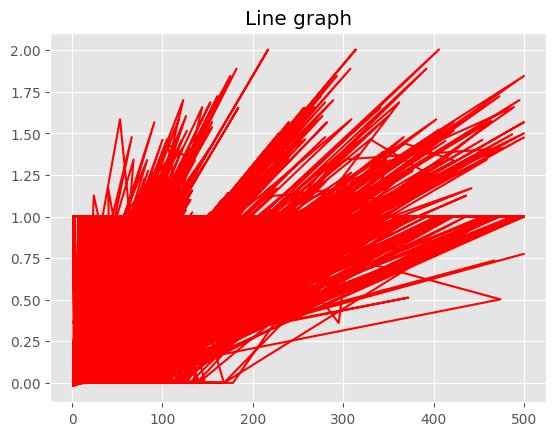

In [ ]:
# plt.title("Line graph")
# plt.plot(X_train, y_train, color="red")
# plt.plot(X_train, regressor.predict(X_train), color = 'red')

[0.50925817 0.49074183]


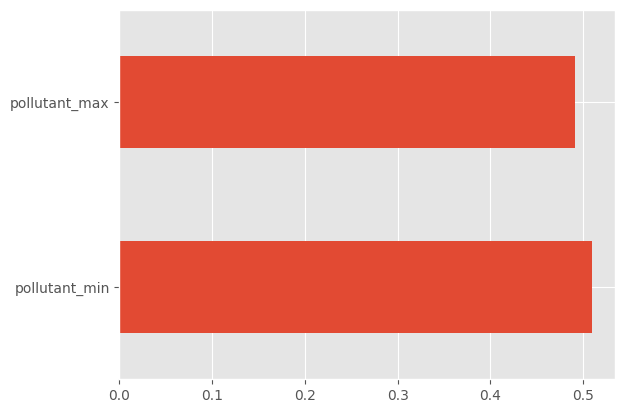

In [ ]:
X = df2.iloc[:, :2]  #independent columns
y = df2.iloc[:,-1]    #target column i.e price range
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

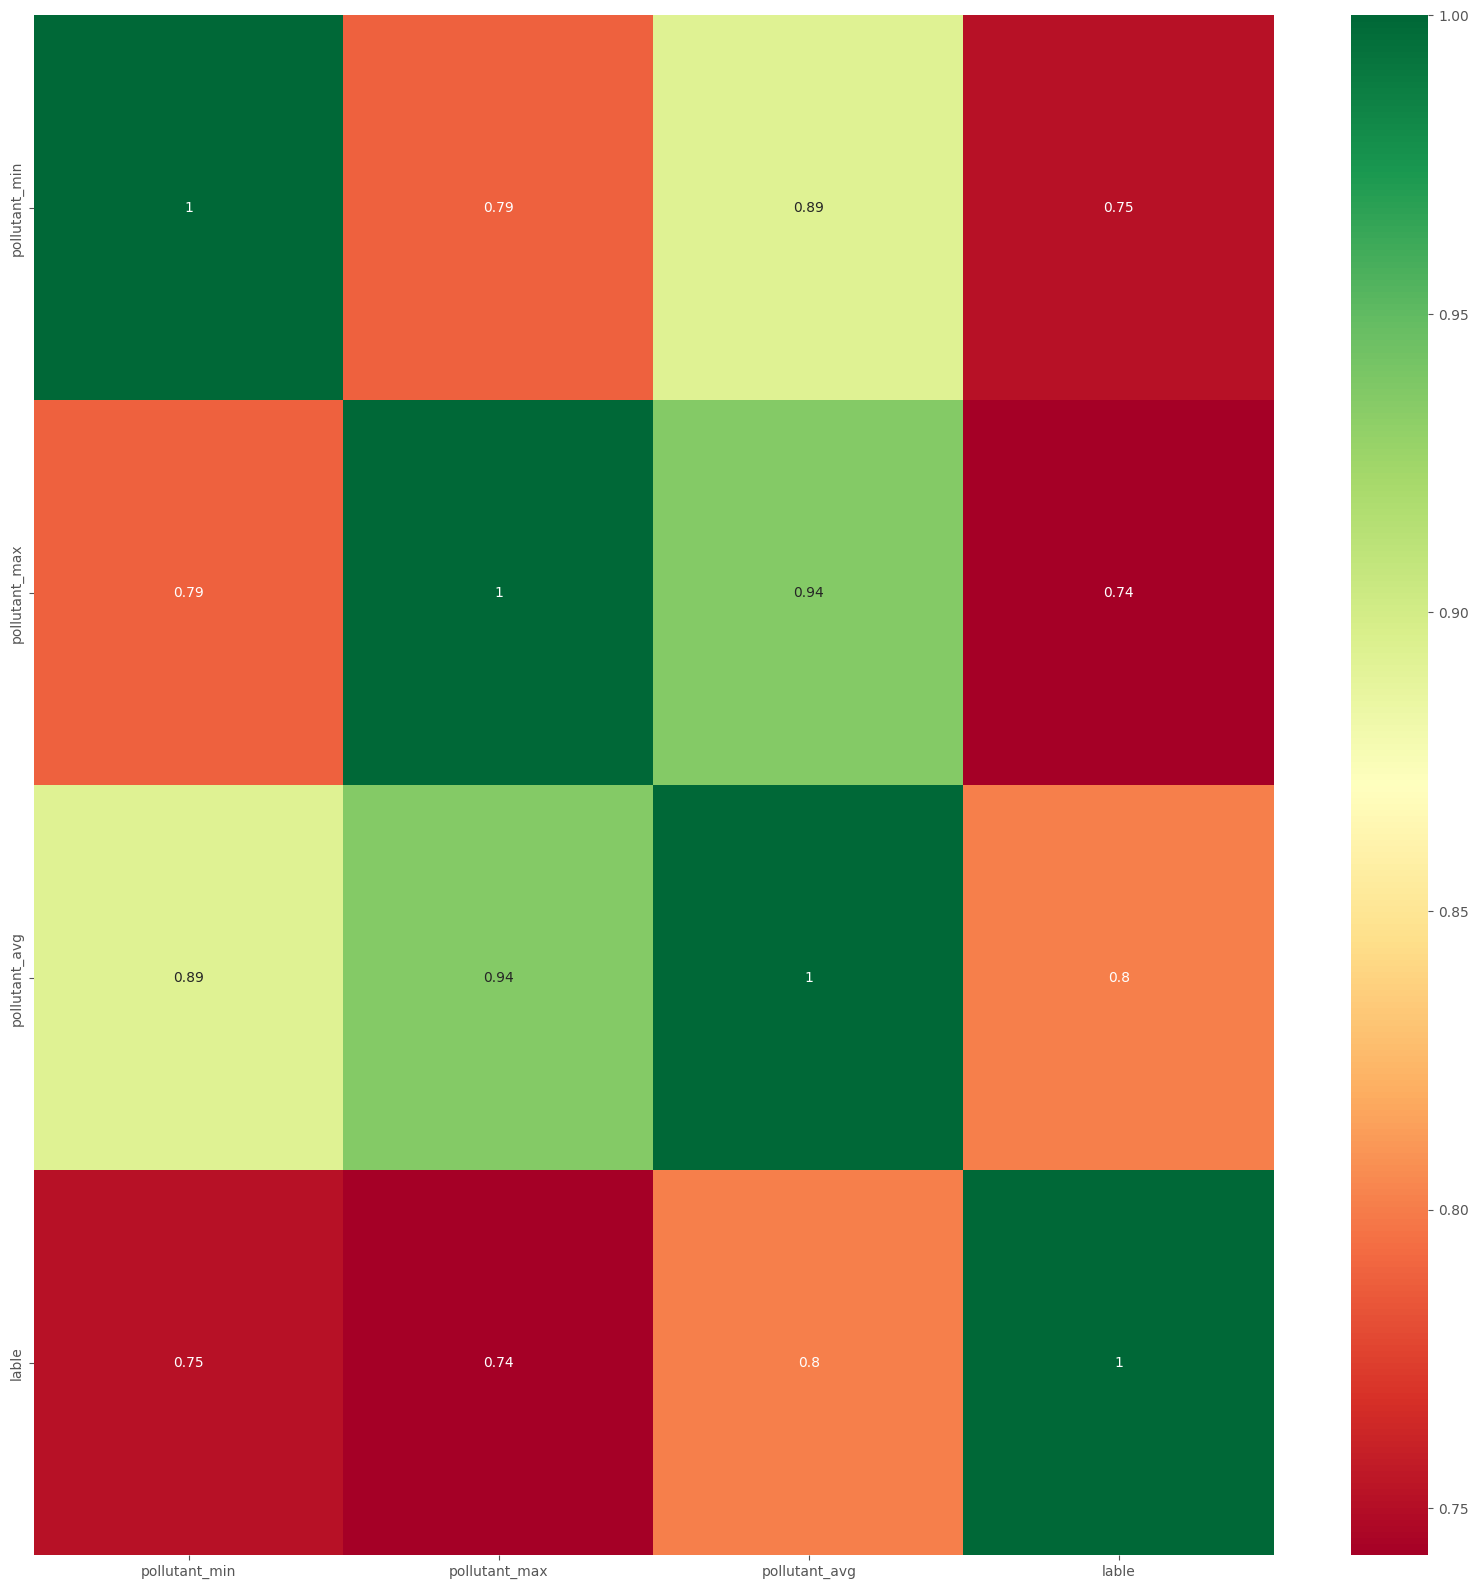

In [ ]:
X = df2.iloc[:,:2]  #independent columns
y = df2.iloc[:,-1]    #target column i.e price range
#get correlations of each features in dataset
corrmat = df2.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df2[top_corr_features].corr(),annot=True,cmap="RdYlGn")